#  This is Lab 1 executable file
This file contains the program code that is the solution to the tasks from the file [lab_1_task.txt](https://github.com/vandosik/M-M-MSA/blob/master/Lab_1/lab_1_task.txt).
## Authors
* Ivan Dubinin: [vandosik](https://github.com/vandosik)
* Alexey Grandilevskii: [zer0deck](https://github.com/zer0deck)
* Mikhail Sorokin: [Mikha1lSorokin](https://github.com/Mikha1lSorokin)

In [905]:
# libs initialization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit, minimize
import seaborn as sns

In [906]:
# Dataset initialization
path_to_file = '../Datasets/GameStats.csv'
source_df = pd.read_csv(path_to_file, engine='python')
source_df.head(5)

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,520,30,False,1.579998,150,0.0
1,9/7/2019 2:44:46 PM,520,30,False,3.805001,100,0.0
2,9/7/2019 2:59:20 PM,520,30,False,1.783006,50,0.0
3,9/7/2019 2:59:28 PM,520,30,True,0.263020,0,0.0
4,9/7/2019 2:59:48 PM,520,30,True,3.318019,50,0.0


Date:        date and time the game was auto-played

Level:       the 3-digit number is an estimate of the difficulty from a previous run

NumBlocks:   how many blocks have to be broken to win the level

IsWin:       True if autoplay broke all the blocks, False if the ball fell past the paddle

ElapsedTime: Seconds until either won or lost (game is played at 4x speed, so multiply by 4 to get an estimate of how long a human might play it)

Score:       total score when the game was won or lost

Accuracy:    the autoplay is tuned with a randomly-chosen accuracy. Higher numbers are more likely to win;

In [907]:
# Select column

# col_names = ['Date',	'Level',	'NumBlocks',	'IsWin',	'ElapsedTime',	'Score',	'Accuracy']
col_names = list(source_df.columns)
# col_name = col_names[4]
# col_name = "Accuracy"
# col_name = "ElapsedTime"
col_name = "Score"


In [908]:
# Remove outliers
if True: # cut by quantiles
    if col_name == 'ElapsedTime':
        up_quant = 0.995
        down_quant = 0.005
    elif col_name == 'Accuracy':
        up_quant = 0.995
        down_quant = 0.005
    elif col_name == 'Score':
        up_quant = 0.9835
        down_quant = 0.0001

    q_low = source_df[col_name].quantile(down_quant)
    q_hi  = source_df[col_name].quantile(up_quant)

    source_df = source_df[(source_df[col_name] < q_hi) & (source_df[col_name] > q_low)]
else: # cut by zscore
    source_df[(np.abs(scipy.stats.zscore(source_df)) < 3).all(axis=1)]

Text(0, 0.5, 'Column val')

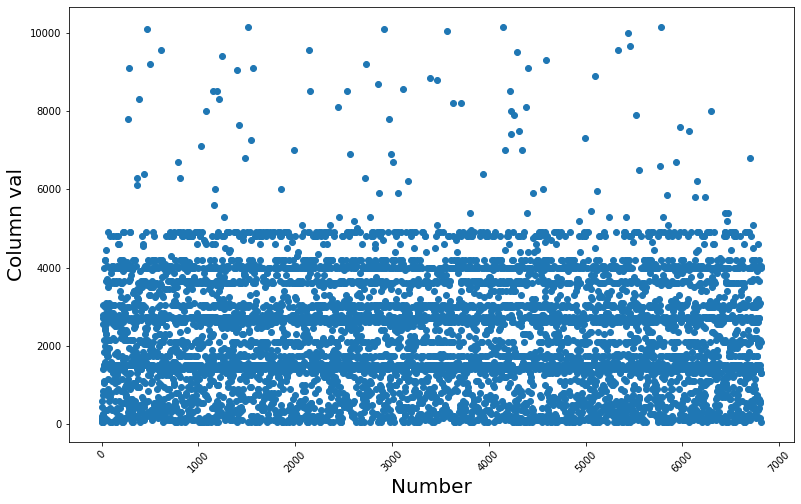

In [909]:
# Display our data
plt.figure(figsize=(13, 8))

plt.scatter(source_df.index, source_df[col_name])
plt.xticks(rotation=45)

plt.xlabel(u'Number', fontsize = 20)
plt.ylabel(u'Column val', fontsize = 20)

## Exercise №2
You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

No handles with labels found to put in legend.


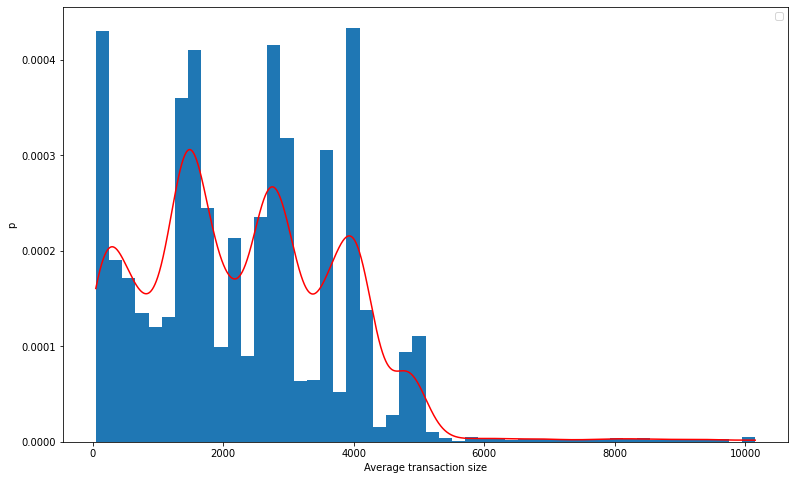

In [910]:
#Plotting a histogram and kernel density estimate
plt.figure(figsize=(13, 8))

kernel = scipy.stats.gaussian_kde(source_df[col_name])

min_amount, max_amount = source_df[col_name].min(), source_df[col_name].max()
x = np.linspace(min_amount, max_amount, len(source_df)) # by defaul 50 items
kde_values = kernel(x)

# sns.histplot(source_df[col_name], kde=False, stat="density", label=f'Average transaction size in rubles')
# Draw unnormed histogramm
hist_data = plt.hist(source_df[col_name], density=True, bins=50)

# print(hist_vals)
plt.plot(x, kde_values, color="r")

plt.ylabel('p')
plt.xlabel('Average transaction size')

plt.legend()
plt.show()

## Exercise №3
You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

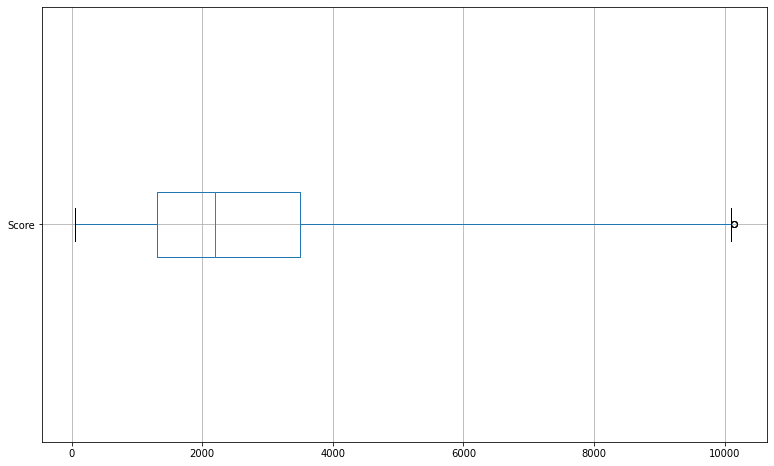

In [911]:
plt.figure(figsize=(13, 8))
# Calculation of sample mean, variance, standard deviation, median
mean = source_df[col_name].mean()
var = source_df[col_name].var()
std = source_df[col_name].std()
median = source_df[col_name].median()
# Box plot
boxplot = source_df.boxplot(column=[col_name], whis=3., vert=False) # defaul whis is 1.5 (to many outliers there)
# boxplot = source_df.boxplot(column=['Accuracy'])

## Exercise №4
Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results. 

MLE:  (0.2743438810037161, -3109.532270683637, 5236.180322775224)
LSE:  [ 2.90527526e-02 -5.60944098e+04  5.80661261e+04]


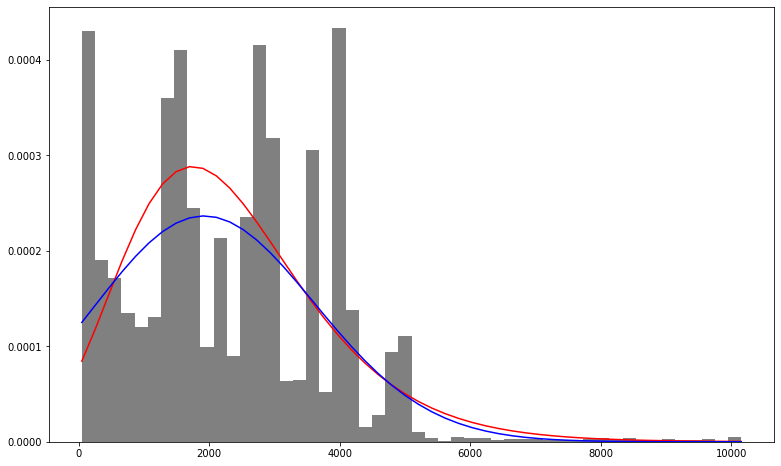

In [912]:
plt.figure(figsize=(13, 8))
# Determination of the parameters of the distribution 

hist_data = plt.hist(source_df[col_name], density=True, bins=50, color='grey')
x = np.linspace(min_amount, max_amount)

if col_name == 'ElapsedTime':
    # The lognorm distribution parameters are determined using the fit function based on the maximum likelihood method
    mle_params = scipy.stats.lognorm.fit(source_df[col_name])
    print("MLE: ", mle_params)
    pdf_mle = scipy.stats.lognorm.pdf(x, *mle_params)

elif col_name == 'Accuracy':
    mle_params = scipy.stats.uniform.fit(source_df[col_name])
    print("MLE: ", mle_params)
    pdf_mle = scipy.stats.uniform.pdf(x, *mle_params)

elif col_name == 'Score':
    mle_params = scipy.stats.lognorm.fit(source_df[col_name], loc=1.1, scale=1.1) # Make initial Guess
    print("MLE: ", mle_params)
    pdf_mle = scipy.stats.lognorm.pdf(x, *mle_params)

plt.plot(x, pdf_mle, color='r')

#  The distribution parameters are determined using the fit function based on least squares method
# Prepare data for least squares
hist_bins = hist_data[1][:-1]  # remove last element
delta = hist_bins[1]-hist_bins[0]
hist_bins += delta / 2 # Take centres of bins
# print(hist_bins)
hist_vals = hist_data[0] # Get the height of bins for least squares
# print(hist_vals)

if col_name == 'ElapsedTime':
    def lognorm(arg_x, s, loc, scale):
        return scipy.stats.lognorm.pdf(arg_x, s, loc, scale)
    
    def lst_sqrs(par_ar, gt, x):
        s, loc, scale = par_ar
        return sum((gt - lognorm(x, s, loc, scale))**2)

    lse_params = minimize(lst_sqrs, [1.1, 1.1, 1.1], method = 'Nelder-Mead', args=(hist_vals, hist_bins), tol=0.001, options={'disp': True})
    print("LSE: ",lse_params.x)
    pdf_lsm = scipy.stats.lognorm.pdf(x, *lse_params.x)

elif col_name == 'Accuracy':

    def uniform(arg_x, loc, scale):
        ret_vals = np.array([1./(scale)] * len(arg_x))

        ret_vals[arg_x < loc] = 0
        ret_vals[arg_x > (loc + scale)] = 0

        return ret_vals

    def lst_sqrs(par_ar, gt, x):
        loc, scale = par_ar
        return sum((gt - uniform(x, loc, scale))**2)

    lse_params = minimize(lst_sqrs, [0., 10.], method = 'Nelder-Mead', args=(hist_vals, hist_bins), tol=0.001)
    print("LSE: ", lse_params.x)
    pdf_lsm = scipy.stats.uniform.pdf(hist_bins, *lse_params.x)

elif col_name == 'Score':
    def lognorm(arg_x, s, loc, scale):
        return scipy.stats.lognorm.pdf(arg_x, s, loc, scale)
    
    def lst_sqrs(par_ar, gt, x):
        s, loc, scale = par_ar
        return sum((gt - lognorm(x, s, loc, scale))**2)

    lse_params = minimize(lst_sqrs, [1.1, 1.1, 1.1], method = 'Nelder-Mead', args=(hist_vals, hist_bins), tol=0.001, options={'disp': True})
    print("LSE: ",lse_params.x)
    pdf_lsm = scipy.stats.lognorm.pdf(x, *lse_params.x)

plt.plot(x, pdf_lsm, color='b')



## Exercise №5
Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

In [913]:
# Print Gained distribs by MLE and LSE



## Exercise №6
Validate your estimated parameters using QQ biplots.

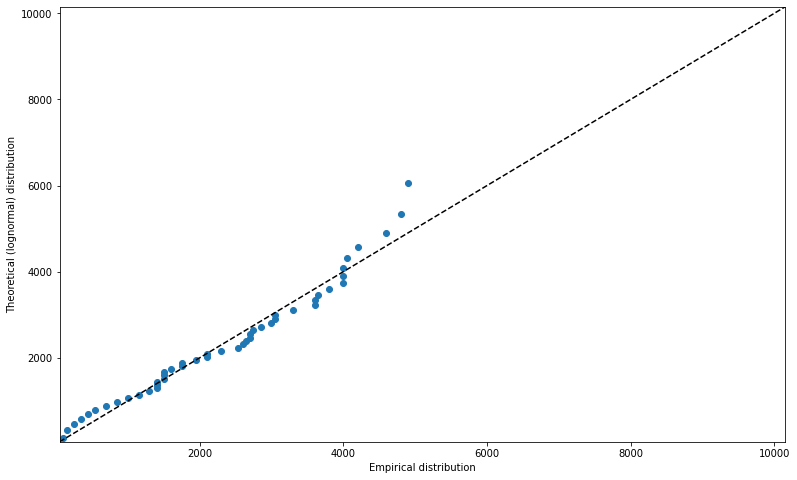

In [914]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs_num = 50
percs = np.linspace(0, 100, percs_num)
qn_real = np.percentile(source_df[col_name], percs)

if col_name == 'ElapsedTime':
    qn_theor = scipy.stats.lognorm.ppf(percs / 100.0, *mle_params)
elif col_name == 'Accuracy':
    qn_theor = scipy.stats.uniform.ppf(percs / 100.0, *mle_params)
elif col_name == 'Score':
    qn_theor = scipy.stats.lognorm.ppf(percs / 100.0, *mle_params)



# Building a quantile biplot
plt.figure(figsize=(13, 8))
plt.plot(qn_real, qn_theor, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(min_amount, max_amount)
plt.ylim(min_amount, max_amount)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()

## Exercise №7
Estimate  correctness of fitted distributions using at least 2 statistical tests.

In [915]:
# Calculation of the Kolmogorov-Smirnov test, Cramér-von Mises test  and chi-square (Pirson test?)

if col_name == 'ElapsedTime':
    ks = scipy.stats.kstest(source_df[col_name], 'lognorm', mle_params, N=100)
    cvm = scipy.stats.cramervonmises(source_df[col_name], 'lognorm', mle_params)
    # chi2 = scipy.stats.chisquare(source_df[col_name])

elif col_name == 'Accuracy':
    ks = scipy.stats.kstest(source_df[col_name], 'uniform', mle_params, N=100)
    cvm = scipy.stats.cramervonmises(source_df[col_name], 'uniform', mle_params)
    # chi2 = scipy.stats.chisquare(source_df[col_name])

elif col_name == 'Score':
    ks = scipy.stats.kstest(source_df[col_name], 'lognorm', mle_params, N=100)
    cvm = scipy.stats.cramervonmises(source_df[col_name], 'lognorm', mle_params)
    # chi2 = scipy.stats.chisquare(source_df[col_name])

print(ks)
print(cvm)
# print(chi2)

KstestResult(statistic=0.08714050873248691, pvalue=6.740076309084487e-43)
CramerVonMisesResult(statistic=7.407228136566552, pvalue=5.685293347212905e-10)
